# Astrophysics laboratory: standard stars data analysis

## First star (used for M71 calibration): `58Aql`

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from astropy.io import fits
import os

# Matplotlib style ;)
plt.style.use('https://github.com/kaiuki2000/PitayaRemix/raw/main/PitayaRemix.mplstyle')

# Reset matplotlib style
# plt.rcParams.update(plt.rcParamsDefault)

In [33]:
def generateCalibratedFrames(filter: str) -> None:
    """
    Description:
        Generates calibrated images for a given filter, aka, subtracts master bias and divides by master flat.
    Args:
        filter (str): filter of the light frames to be used. Input should be 'Red', 'Green' or 'Blue'.
    Outputs:
        calibrated images (FITS files).
    """

    # Reading created master bias file.
    masterBias = fits.open('Calibration_Frames/MasterBias.fits')[0].data

    # Reading created master flat files. 
    if(filter == "Green"):  masterFlat = fits.open('Calibration_Frames/MasterFlatGreen.fits')[0].data; print("Generating Green..."); d = 0
    elif(filter == "Blue"): masterFlat = fits.open('Calibration_Frames/MasterFlatBlue.fits')[0].data; print("Generating Blue...");   d = 0
    elif(filter == "Red"):  masterFlat = fits.open('Calibration_Frames/MasterFlatRed.fits')[0].data; print("Generating Red...");     d = 4
    # Red has d = 2, because of a naming mistake previously, I guess...

    # Storage directory
    dir_Images = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/All_Images/"

    # Reading light f'{filter}' files
    light_X_Files, light_X_All, header_g_All = [], [], []
    for file_n in os.listdir(dir_Images):
         if ("58Aql" in file_n and f"{filter}" in file_n): light_X_Files.append(file_n)
    light_X_Files = light_X_Files[d:]
    print(f"Verification ({len(light_X_Files)} files read): light{filter}Files = {light_X_Files}")
    for file_n in light_X_Files:
        light_X_All.append(fits.open(dir_Images + file_n)[0].data)
        header_g_All.append(fits.open(dir_Images + file_n)[0].header)

    # Correction with bias and flat.
    light_X_All_corrected = (light_X_All - masterBias)/masterFlat
    print(f'Exposure time ({filter}) = {header_g_All[0]["EXPTIME"]}s.')
    for n, frame in enumerate(light_X_All_corrected):
        fits.writeto(f'C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/58Aql/{light_X_Files[n]}', frame, header_g_All[n], overwrite = True)

# Generating calibrated images.
generateCalibratedFrames("Red"); print()
generateCalibratedFrames("Green"); print()
generateCalibratedFrames("Blue")

Generating Red...
Verification (10 files read): lightRedFiles = ['58Aql_2023-09-19_21-32-35_Red_0187.fits', '58Aql_2023-09-19_21-32-40_Red_0188.fits', '58Aql_2023-09-19_21-32-45_Red_0189.fits', '58Aql_2023-09-19_21-32-49_Red_0190.fits', '58Aql_2023-09-19_21-32-54_Red_0191.fits', '58Aql_2023-09-19_21-32-59_Red_0192.fits', '58Aql_2023-09-19_21-33-03_Red_0193.fits', '58Aql_2023-09-19_21-33-08_Red_0194.fits', '58Aql_2023-09-19_21-33-13_Red_0195.fits', '58Aql_2023-09-19_21-33-17_Red_0196.fits']
Exposure time (Red) = 2.0s.

Generating Green...
Verification (10 files read): lightGreenFiles = ['58Aql_2023-09-19_21-34-00_Green_0197.fits', '58Aql_2023-09-19_21-34-05_Green_0198.fits', '58Aql_2023-09-19_21-34-11_Green_0199.fits', '58Aql_2023-09-19_21-34-17_Green_0200.fits', '58Aql_2023-09-19_21-34-22_Green_0201.fits', '58Aql_2023-09-19_21-34-28_Green_0202.fits', '58Aql_2023-09-19_21-34-34_Green_0203.fits', '58Aql_2023-09-19_21-34-39_Green_0204.fits', '58Aql_2023-09-19_21-34-45_Green_0205.fits', '5

### Alignment, using `astroalign`:

In [12]:
import astroalign as aa

dir_Light = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/58Aql/"
files = []; filter = 'Red' # Change filter here.
for file_n in os.listdir(dir_Light):
     if ("58Aql" in file_n and f"{filter}" in file_n): files.append(file_n)
print(files)

reference_image = fits.open(dir_Light + files[0])[0].data + 0
for i in range(0, len(files)):
    image_data = fits.open(dir_Light + files[i])
    source_image = image_data[0].data + 0  # Here, the addition of zero (0) solves the the endian compiler issue.
    header = image_data[0].header
    image_aligned, footprint = aa.register(source_image, reference_image)
    aligned_file = files[i].replace('.fits', '')
    fits.writeto('../58Aql/Aligned/' + aligned_file + '_AlignedColour' + '.fits', image_aligned, header, overwrite = True)
    print('No. %i alignment done.' %i)

['58Aql_2023-09-19_21-32-35_Red_0187.fits', '58Aql_2023-09-19_21-32-40_Red_0188.fits', '58Aql_2023-09-19_21-32-45_Red_0189.fits', '58Aql_2023-09-19_21-32-49_Red_0190.fits', '58Aql_2023-09-19_21-32-54_Red_0191.fits', '58Aql_2023-09-19_21-32-59_Red_0192.fits', '58Aql_2023-09-19_21-33-03_Red_0193.fits', '58Aql_2023-09-19_21-33-08_Red_0194.fits', '58Aql_2023-09-19_21-33-13_Red_0195.fits', '58Aql_2023-09-19_21-33-17_Red_0196.fits']
No. 0 alignment done.
No. 1 alignment done.
No. 2 alignment done.
No. 3 alignment done.
No. 4 alignment done.
No. 5 alignment done.
No. 6 alignment done.
No. 7 alignment done.
No. 8 alignment done.
No. 9 alignment done.


Stacking now...

In [16]:
# Storage directory
dir_Light = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/58Aql/Aligned/"
filter = "Green" # Red, Green or Blue. Change this to change the filter.

# Reading light f'{filter}' files
light_X_Files, light_X_All, header_g_All = [], [], []
for file_n in os.listdir(dir_Light):
     if ("58Aql" in file_n and f"{filter}" in file_n): light_X_Files.append(file_n)
print(f"Verification ({len(light_X_Files)} files read): light{filter}Files = {light_X_Files}")
for file_n in light_X_Files:
    light_X_All.append(fits.open(dir_Light + file_n)[0].data)
    header_g_All.append(fits.open(dir_Light + file_n)[0].header)

lightBlue_Stack = np.median(light_X_All, axis = 0) # Sum or median here? Median looks better.
                                                   # Should sum be better? Because we want to have more counts?
fits.writeto('../58Aql/Aligned/' + filter + '_Stacked' + '.fits', lightBlue_Stack, header_g_All[0], overwrite = True)

Verification (10 files read): lightGreenFiles = ['58Aql_2023-09-19_21-34-00_Green_0197_AlignedColour.fits', '58Aql_2023-09-19_21-34-05_Green_0198_AlignedColour.fits', '58Aql_2023-09-19_21-34-11_Green_0199_AlignedColour.fits', '58Aql_2023-09-19_21-34-17_Green_0200_AlignedColour.fits', '58Aql_2023-09-19_21-34-22_Green_0201_AlignedColour.fits', '58Aql_2023-09-19_21-34-28_Green_0202_AlignedColour.fits', '58Aql_2023-09-19_21-34-34_Green_0203_AlignedColour.fits', '58Aql_2023-09-19_21-34-39_Green_0204_AlignedColour.fits', '58Aql_2023-09-19_21-34-45_Green_0205_AlignedColour.fits', '58Aql_2023-09-19_21-34-51_Green_0206_AlignedColour.fits']


Now, we have 3 images, with the three filters, that we can work with (for doing photometry and determining the stars' colours.)

``` 
For fun section: Alignment for RGB colour image ;)
```

In [21]:
dir_Light = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/58Aql/Aligned/"
files = []
for file_n in os.listdir(dir_Light):
     if ("Stacked" in file_n): files.append(file_n)
print(files)

reference_image = fits.open(dir_Light + files[0])[0].data + 0
for i in range(0, len(files)):
    image_data = fits.open(dir_Light + files[i])
    source_image = image_data[0].data + 0  # Here, the addition of zero (0) solves the the endian compiler issue.
    header = image_data[0].header
    image_aligned, footprint = aa.register(source_image, reference_image, max_control_points = 3, detection_sigma = 1)
    aligned_file = files[i].replace('.fits', '')
    fits.writeto('../58Aql/Aligned/' + aligned_file + '_aligned' + '.fits', image_aligned, header, overwrite = True)
    print('No. %i alignment done.' %i)

['Blue_Stacked.fits', 'Green_Stacked.fits', 'Red_Stacked.fits']
No. 0 alignment done.
No. 1 alignment done.
No. 2 alignment done.


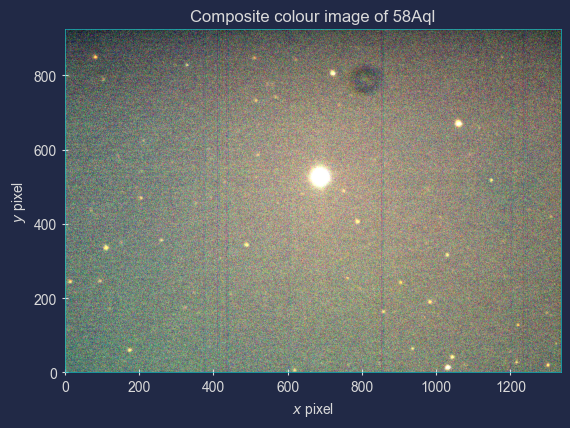

In [31]:
from astropy.visualization import make_lupton_rgb, PowerStretch, ZScaleInterval

forCasting = np.float_()

# Read the three images. Need to interpret as 'float', otherwise 'make_lupton_rgb' complains.
r = fits.open('C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/58Aql/Aligned/Red_Stacked_aligned.fits'  )[0].data
g = fits.open('C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/58Aql/Aligned/Green_Stacked_aligned.fits')[0].data
b = fits.open('C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/58Aql/Aligned/Blue_Stacked_aligned.fits' )[0].data

# Crop the top and the right margin (contains black pixels, from the alignment process)
r = r[50:-50, 100:-100]
g = g[50:-50, 100:-100]
b = b[50:-50, 100:-100]

# Casting to float
r = np.array(r, forCasting)
g = np.array(g, forCasting)
b = np.array(b, forCasting)

stretch = PowerStretch(a = 1) + ZScaleInterval() # PowerStretch (a = 1) is a linear stretch.

r = stretch(r)
g = stretch(g) # Random factors to make the image look prettier ;)
b = stretch(b)

# Plot RGB individually/separately, if you want to.
# plt.imshow(r, cmap = "Reds", origin = 'lower')
# plt.imshow(g, cmap = "Greens", origin = 'lower')
# plt.imshow(b, cmap = "Blues", origin = 'lower')

lo_val, up_val = np.percentile(np.hstack((r.flatten(), g.flatten(), b.flatten())), (0.5, 99.5))  # Get the value of lower and upper 0.5% of all pixels
stretch_val = up_val - lo_val
rgb_default = make_lupton_rgb(r, g, b, minimum = lo_val, Q = 0, stretch = stretch_val, filename = "M71-Default.jpeg")

# Cut the top rows - contains black pixels
# rgb_default = rgb_default[50:-50, 100:-100, :]

plt.imshow(rgb_default, origin = 'lower')
plt.title('Composite colour image of 58Aql')
plt.xlabel(r'$x$ pixel')
plt.ylabel(r'$y$ pixel')
plt.grid(False)
plt.savefig('58Aql_CompositeRGB.png', dpi = 600, bbox_inches = 'tight')
plt.show()

## Second star (used for M39 calibration): `HIP 106049`
Note that we only have **B** and **V** frames, as **R** appears to have been compromised by clouds :(

In [38]:
def generateCalibratedFramesM39(filter: str) -> None:
    """
    Description:
        Generates calibrated images for a given filter, aka, subtracts master bias and divides by master flat.
    Args:
        filter (str): filter of the light frames to be used. Input should be 'Red', 'Green' or 'Blue'.
    Outputs:
        calibrated images (FITS files).
    """

    # Reading created master bias file.
    masterBias = fits.open('../M39_Day_Calibration/MasterBias.fits')[0].data

    # Reading created master flat files. 
    if(filter == "Green"):  masterFlat = fits.open('../M39_Day_Calibration/MasterFlatGreen.fits')[0].data; print("Generating Green..."); d = 0
    elif(filter == "Blue"): masterFlat = fits.open('../M39_Day_Calibration/MasterFlatBlue.fits')[0].data; print("Generating Blue...");   d = 0
    elif(filter == "Red"):  masterFlat = fits.open('../M39_Day_Calibration/MasterFlatRed.fits')[0].data; print("Generating Red...");     d = 0

    # Storage directory
    dir_Images = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/20230921_M39_Day/"

    # Reading light f'{filter}' files
    light_X_Files, light_X_All, header_g_All = [], [], []
    for file_n in os.listdir(dir_Images):
         if ("hp106049" in file_n and f"{filter}" in file_n): light_X_Files.append(file_n)
    light_X_Files = light_X_Files[d:]
    print(f"Verification ({len(light_X_Files)} files read): light{filter}Files = {light_X_Files}")
    for file_n in light_X_Files:
        light_X_All.append(fits.open(dir_Images + file_n)[0].data)
        header_g_All.append(fits.open(dir_Images + file_n)[0].header)

    # Correction with bias and flat.
    light_X_All_corrected = (light_X_All - masterBias)/masterFlat
    print(f'Exposure time ({filter}) = {header_g_All[0]["EXPTIME"]}s.')
    for n, frame in enumerate(light_X_All_corrected):
        fits.writeto(f'C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/HIP106049/{light_X_Files[n]}', frame, header_g_All[n], overwrite = True)

# Generating calibrated images.
# generateCalibratedFramesM39("Red"); print() # Red is unusable here.
generateCalibratedFramesM39("Green"); print()
generateCalibratedFramesM39("Blue")

Generating Green...
Verification (1 files read): lightGreenFiles = ['hp106049_2023-09-21_21-57-11_Green_0205.fits']
Exposure time (Green) = 5.0s.

Generating Blue...
Verification (1 files read): lightBlueFiles = ['hp106049_2023-09-21_21-56-14_Blue_0204.fits']
Exposure time (Blue) = 5.0s.


This should be enough to do photometry. Hopefully, the images are good enough in quality.
### Star finder procedure:
- **Green** filter first:

Found 5 stars in image.


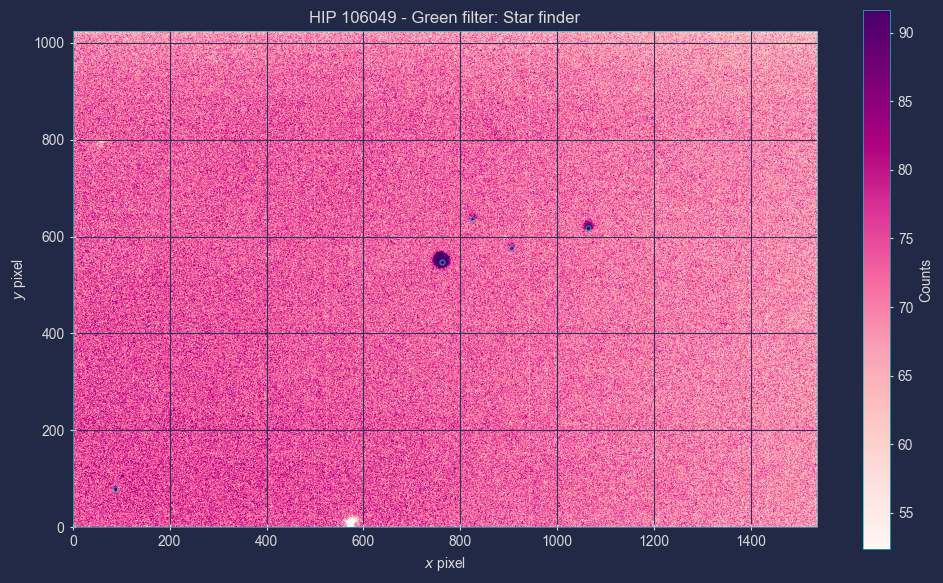

Brigthest (HIP 106049) star's characteristics:
 id     xcentroid         ycentroid         sharpness          roundness1         roundness2     npix sky        peak               flux                mag        
--- ----------------- ----------------- ------------------ ------------------ ------------------ ---- --- ------------------ ------------------ -------------------
  2 761.7735248802713 547.0536803698188 0.6232549925591608 0.2588804857536907 0.0285586546820758  361 0.0 1598.8779773066778 126.25648800792808 -5.2531342617023515


In [54]:
# Find stars in the field
from photutils.detection import DAOStarFinder
from astropy.stats import sigma_clipped_stats, gaussian_sigma_to_fwhm

dir_Light   = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/HIP106049/"
Green_frame = "hp106049_2023-09-21_21-57-11_Green_0205.fits"
data_g = fits.open(dir_Light + Green_frame)[0].data + 0  # Here, the addition of zero (0) solves the the endian compiler issue.

# Get background
mean, median, std = sigma_clipped_stats(data_g, sigma = 5.0, maxiters = 5)
# Find stars
daofind = DAOStarFinder(fwhm = 15.0, threshold = 5.0 * std)  # 'peakmax' to exclude saturated stars!  
sources = daofind(data_g - median)
print("Found %i stars in image." %len(sources))

# Plot stars found
fig = plt.figure(figsize = (12, 7))
plt.title("HIP 106049 - Green filter: Star finder")
l1 = np.percentile(data_g[np.isfinite(data_g)].flatten(), 1.5)
l2 = np.percentile(data_g[np.isfinite(data_g)].flatten(), 98.5)
plt.imshow(data_g, clim = (l1, l2), origin = 'lower')
plt.colorbar(label = 'Counts')
plt.plot(sources["xcentroid"], sources["ycentroid"], 'o', mfc = 'none', markersize = 3.5, alpha = 0.65)
plt.xlabel(r'$x$ pixel')
plt.ylabel(r'$y$ pixel')
plt.show()

# Take 'nbright' brightest stars and print list of their fluxes
nbright = 1
brightest = np.argsort(sources['flux'])[::-1][0:nbright]
brsources = sources[brightest]
print("Brigthest (HIP 106049) star's characteristics:")
brsources.pprint(max_width = 250) # Print 'nbright' brigthest sources

- **Blue** filter second:

Found 2 stars in image.


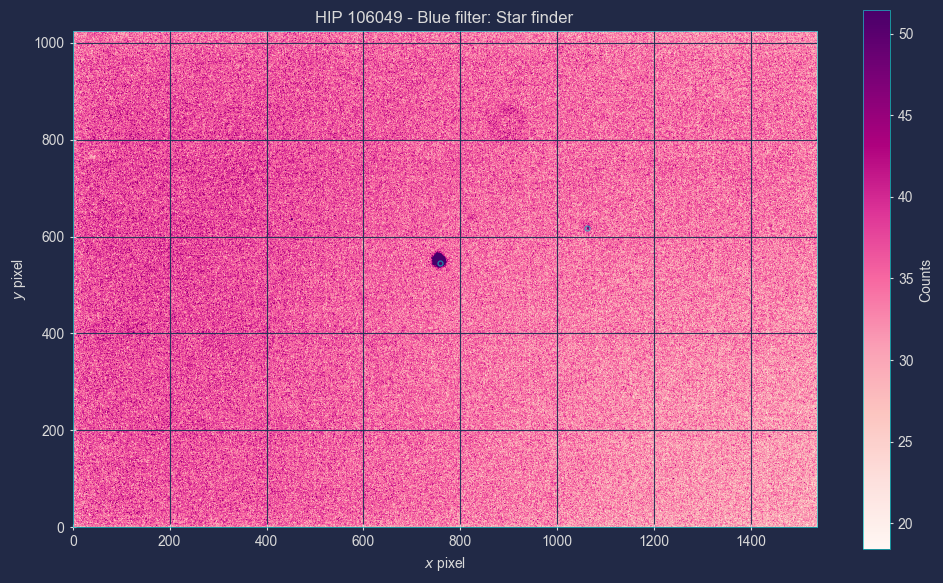

Brigthest (HIP 106049) star's characteristics:
 id     xcentroid         ycentroid         sharpness           roundness1          roundness2      npix sky        peak              flux              mag        
--- ----------------- ----------------- ------------------ ------------------- -------------------- ---- --- ----------------- ----------------- ------------------
  1 759.1476843137381 545.7890186681173 0.6768845266007846 0.36169743336758037 0.060668884209167065  361 0.0 502.2072930067935 47.32616434181371 -4.187753268739842


In [55]:
# Blue filter now:
dir_Light   = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/HIP106049/"
Blue_frame = "hp106049_2023-09-21_21-56-14_Blue_0204.fits"
data_b = fits.open(dir_Light + Blue_frame)[0].data + 0  # Here, the addition of zero (0) solves the the endian compiler issue.

# Get background
mean, median, std = sigma_clipped_stats(data_b, sigma = 5.0, maxiters = 5)
# Find stars
daofind = DAOStarFinder(fwhm = 15.0, threshold = 5.0 * std)  # 'peakmax' to exclude saturated stars!  
sources = daofind(data_b - median)
print("Found %i stars in image." %len(sources))

# Plot stars found
fig = plt.figure(figsize = (12, 7))
plt.title("HIP 106049 - Blue filter: Star finder")
l1 = np.percentile(data_b[np.isfinite(data_b)].flatten(), 1.5)
l2 = np.percentile(data_b[np.isfinite(data_b)].flatten(), 98.5)
plt.imshow(data_b, clim = (l1, l2), origin = 'lower')
plt.colorbar(label = 'Counts')
plt.plot(sources["xcentroid"], sources["ycentroid"], 'o', mfc = 'none', markersize = 3.5, alpha = 0.65)
plt.xlabel(r'$x$ pixel')
plt.ylabel(r'$y$ pixel')
plt.show()

# Take 'nbright' brightest stars and print list of their fluxes
nbright = 1
brightest = np.argsort(sources['flux'])[::-1][0:nbright]
brsources = sources[brightest]
print("Brigthest (HIP 106049) star's characteristics:")
brsources.pprint(max_width = 250) # Print 'nbright' brigthest sources

Will now need to do corrections using this **standard star** and the **airmass** (remember to include this)!